---
## 라이브러리 불러오기
---

In [237]:
import sys,os
import pickle
utils_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop','utils')
sys.path.append(utils_path)

from custom_function import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

---
## 데이터 확인
---

In [238]:
names_file = open('agaricus-lepiota.names','r')
names_content = names_file.read()
print(names_content)

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

특성확인

In [239]:
features ='''
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d
'''

In [240]:
features=features.replace('\t','')
features=features.replace(' ','')
features_list = list()

lines = features.splitlines()
for line in lines:
    if line:
        if line[0] in ['0','1','2','3','4','5','6','7','8','9']:
            features_list.append(line)
features_list

['1.cap-shape:bell=b,conical=c,convex=x,flat=f,',
 '2.cap-surface:fibrous=f,grooves=g,scaly=y,smooth=s',
 '3.cap-color:brown=n,buff=b,cinnamon=c,gray=g,green=r,',
 '4.bruises?:bruises=t,no=f',
 '5.odor:almond=a,anise=l,creosote=c,fishy=y,foul=f,',
 '6.gill-attachment:attached=a,descending=d,free=f,notched=n',
 '7.gill-spacing:close=c,crowded=w,distant=d',
 '8.gill-size:broad=b,narrow=n',
 '9.gill-color:black=k,brown=n,buff=b,chocolate=h,gray=g,',
 '10.stalk-shape:enlarging=e,tapering=t',
 '11.stalk-root:bulbous=b,club=c,cup=u,equal=e,',
 '12.stalk-surface-above-ring:fibrous=f,scaly=y,silky=k,smooth=s',
 '13.stalk-surface-below-ring:fibrous=f,scaly=y,silky=k,smooth=s',
 '14.stalk-color-above-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o,',
 '15.stalk-color-below-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o,',
 '16.veil-type:partial=p,universal=u',
 '17.veil-color:brown=n,orange=o,white=w,yellow=y',
 '18.ring-number:none=n,one=o,two=t',
 '19.ring-type:cobwebby=c,evanescent=e,flaring=f

In [241]:
for idx in range(len(features_list)):
    dot_index = 0
    colons_index = 0
    char = features_list[idx]

    for char_idx in range(len(char)):
        if  char[char_idx]== '.':
            dot_index = char_idx
        elif char[char_idx]== ':':
            colons_index = char_idx
            break
    features_list[idx] = features_list[idx][dot_index+1:colons_index]
features_list.insert(0,'edible')
features_list

['edible',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises?',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [242]:
mushroom_df = pd.read_csv('agaricus-lepiota.data',header=None)
mushroom_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [243]:
mushroom_df.columns = features_list
mushroom_df

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [244]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [245]:
check_na(mushroom_df,target=['?'])

stalk-root열에 ?값이 2480개 있습니다.
결측치가 있습니다


두가지 방법  
1.결측치가 많아서 특성의 일부로 간주  
2.결측치를 포함한 열을 제거  

In [246]:
#고유값 확인
unique_count = 0
for col in mushroom_df.columns:

    print(f'-----------------{col}s unique value-------------')
    print(mushroom_df[col].unique())
    unique_count+= len(mushroom_df[col].unique())
unique_count

-----------------edibles unique value-------------
['p' 'e']
-----------------cap-shapes unique value-------------
['x' 'b' 's' 'f' 'k' 'c']
-----------------cap-surfaces unique value-------------
['s' 'y' 'f' 'g']
-----------------cap-colors unique value-------------
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
-----------------bruises?s unique value-------------
['t' 'f']
-----------------odors unique value-------------
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
-----------------gill-attachments unique value-------------
['f' 'a']
-----------------gill-spacings unique value-------------
['c' 'w']
-----------------gill-sizes unique value-------------
['n' 'b']
-----------------gill-colors unique value-------------
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
-----------------stalk-shapes unique value-------------
['e' 't']
-----------------stalk-roots unique value-------------
['e' 'c' 'b' 'r' '?']
-----------------stalk-surface-above-rings unique value-------------
['s' 'f' 'k' 'y']
---

119

veil 열은 모두 같은 값을 가지고 있기 때문에 drop

In [247]:
mushroom_df.drop(['veil-type'],axis=1,inplace=True)
mushroom_df

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


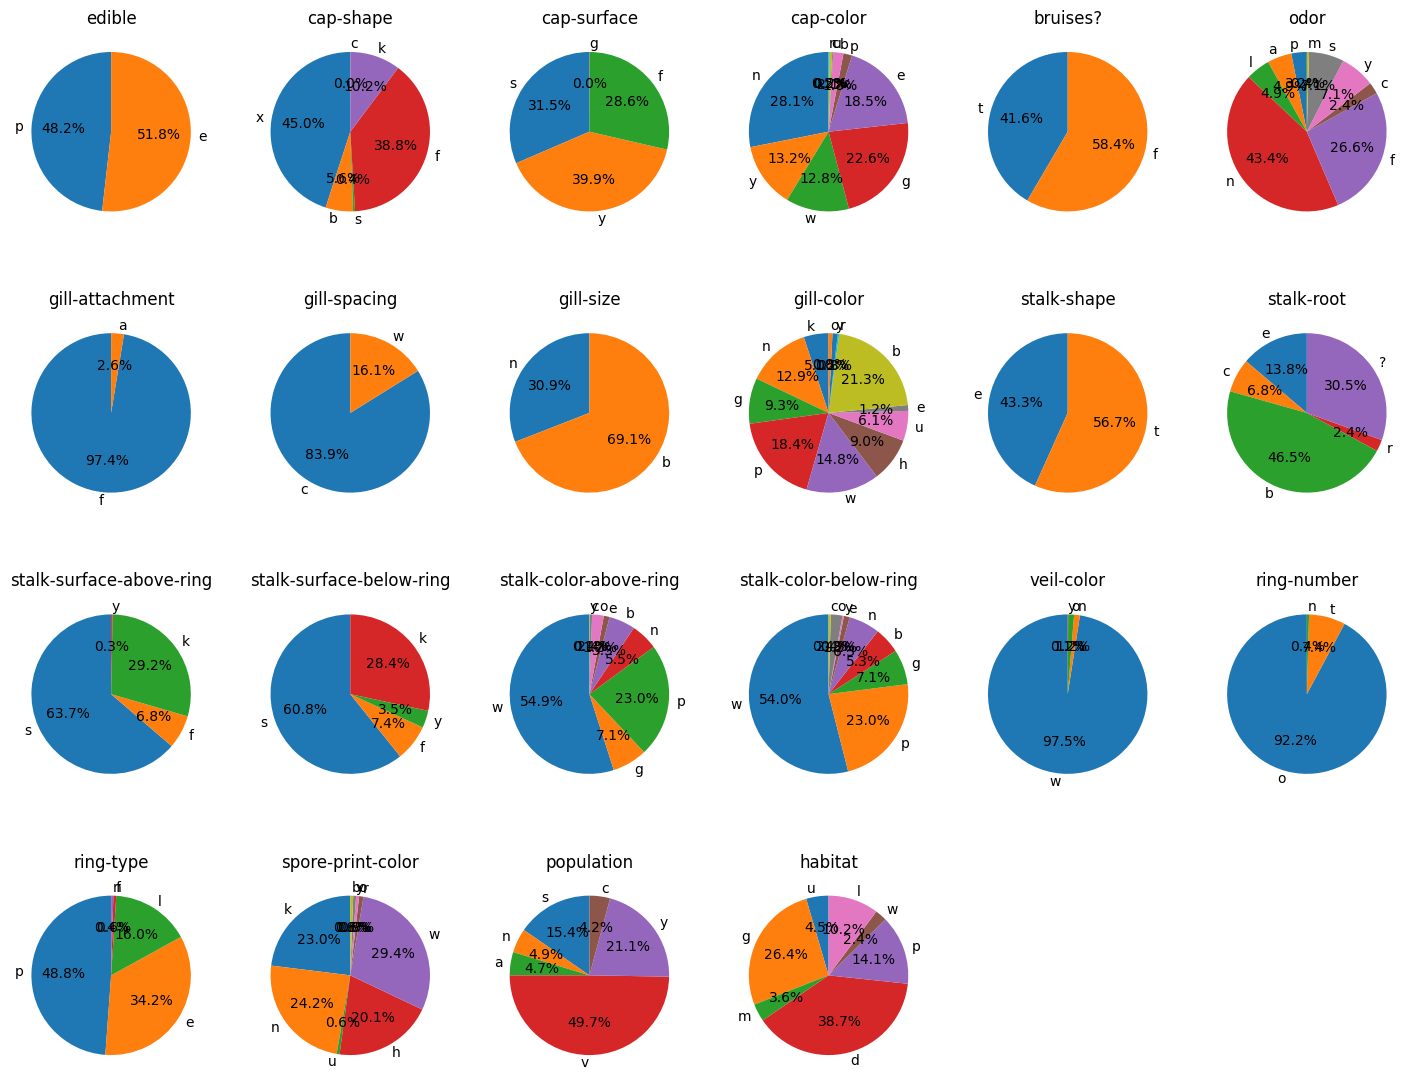

In [248]:
check_pie(mushroom_df,rows=4,cols=6,fig_size=(18,14))

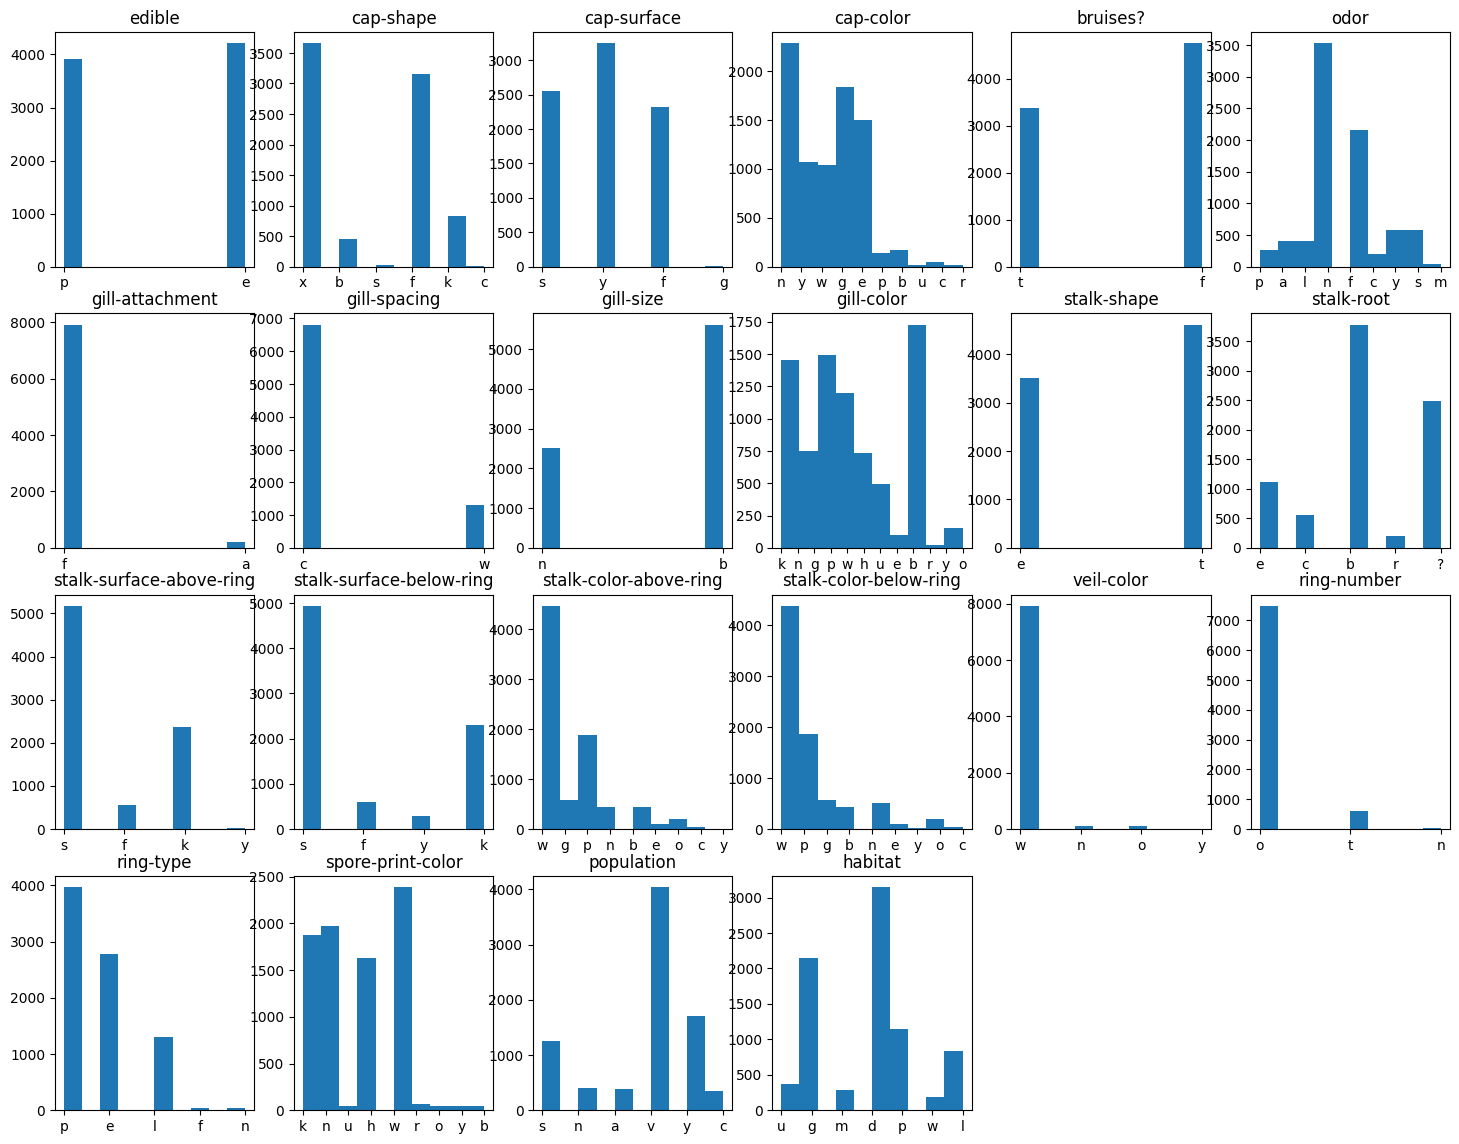

In [249]:
check_hist(mushroom_df,rows=4,cols=6,fig_size=(18,14))

---
## 인코딩
---

In [250]:
labelencoder = LabelEncoder()

In [251]:
for col in mushroom_df.columns:
    mushroom_df[col] = labelencoder.fit_transform(mushroom_df[col])

In [252]:
mushroom_df

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


---
## KNN 모델을 통한 Edible 분류
---

In [253]:
mushroom_df=mushroom_df.sample(frac=1)
train_val_set, test_set = mushroom_df.iloc[:int(len(mushroom_df)*0.8),:], mushroom_df.iloc[int(len(mushroom_df)*0.8):,:]

In [254]:
test_X, test_y = feature_label_spliter(test_set,label_index=0)

In [255]:
fold_num=5
kfold_dict = kfold_generator(train_val_set,K=fold_num,drop_last=False)
accuracy_history = list()

for k in range(1,10):
    knn_model = KNeighborsClassifier(k)
    avg_accuracy = 0.0
    print(f'------------------ K= {k}-----------------------')
    for idx in range(fold_num):
        train_df, val_df = kfold_dict[idx]
        train_X, train_y = feature_label_spliter(train_df,label_index=0)
        val_X, val_y = feature_label_spliter(val_df,label_index=0)

        knn_model.fit(train_X,train_y)
        predictions = knn_model.predict(val_X)
        correct_count = (predictions==val_y).sum()
        fold_accuracy = correct_count/len(val_y)*100
        
        avg_accuracy += fold_accuracy/5

        print(f'[Fold {idx+1}] [Accuracy: {round(fold_accuracy,2)} %]')
    print(f'[K={k}] [Average Accuracy: {round(avg_accuracy,2)} %]')

    joblib.dump(knn_model, f'knn_{k}.pkl')    
    accuracy_history.append((avg_accuracy,k,f'./knn_{k}.pkl'))
    print()

print(f'Best K:{max(accuracy_history)[1]}, Best Acurracy: {max(accuracy_history)[0]} %')

------------------ K= 1-----------------------
[Fold 1] [Accuracy: 100.0 %]
[Fold 2] [Accuracy: 100.0 %]
[Fold 3] [Accuracy: 99.92 %]
[Fold 4] [Accuracy: 99.85 %]
[Fold 5] [Accuracy: 100.0 %]
[K=1] [Average Accuracy: 99.95 %]

------------------ K= 2-----------------------
[Fold 1] [Accuracy: 100.0 %]
[Fold 2] [Accuracy: 100.0 %]
[Fold 3] [Accuracy: 99.92 %]
[Fold 4] [Accuracy: 99.85 %]
[Fold 5] [Accuracy: 99.85 %]
[K=2] [Average Accuracy: 99.92 %]

------------------ K= 3-----------------------
[Fold 1] [Accuracy: 100.0 %]
[Fold 2] [Accuracy: 99.85 %]
[Fold 3] [Accuracy: 99.92 %]
[Fold 4] [Accuracy: 99.77 %]
[Fold 5] [Accuracy: 99.85 %]
[K=3] [Average Accuracy: 99.88 %]

------------------ K= 4-----------------------
[Fold 1] [Accuracy: 100.0 %]
[Fold 2] [Accuracy: 99.85 %]
[Fold 3] [Accuracy: 99.85 %]
[Fold 4] [Accuracy: 99.69 %]
[Fold 5] [Accuracy: 99.85 %]
[K=4] [Average Accuracy: 99.85 %]

------------------ K= 5-----------------------
[Fold 1] [Accuracy: 100.0 %]
[Fold 2] [Accura

In [256]:
best_knn = joblib.load(max(accuracy_history)[2])
test_prediction = best_knn.predict(test_X)

test_correct_count = (test_prediction==test_y).sum()
test_accuracy = test_correct_count/len(test_y)*100

print(f'[File name {max(accuracy_history)[2]}] [Test Accuracy: {round(test_accuracy,2)} %]')

[File name ./knn_1.pkl] [Test Accuracy: 100.0 %]


---
## 랜덤 포레스트를 통한 Edible 분류
---

In [257]:
rf_model = RandomForestClassifier()
avg_accuracy = 0.0
print(f'------------------ RandomForest model-----------------------')
for idx in range(fold_num):
    train_df, val_df = kfold_dict[idx]
    train_X, train_y = feature_label_spliter(train_df,label_index=0)
    val_X, val_y = feature_label_spliter(val_df,label_index=0)

    rf_model.fit(train_X,train_y)
    predictions = rf_model.predict(val_X)
    correct_count = (predictions==val_y).sum()
    fold_accuracy = correct_count/len(val_y)*100
        
    avg_accuracy += fold_accuracy/5

    print(f'[Fold {idx+1}] [Accuracy: {round(fold_accuracy,2)} %]')
print(f'[Average Accuracy: {round(avg_accuracy,2)} %]')
print()

------------------ RandomForest model-----------------------
[Fold 1] [Accuracy: 100.0 %]
[Fold 2] [Accuracy: 100.0 %]
[Fold 3] [Accuracy: 100.0 %]
[Fold 4] [Accuracy: 100.0 %]
[Fold 5] [Accuracy: 100.0 %]
[Average Accuracy: 100.0 %]



In [258]:
test_prediction=rf_model.predict(test_X)
test_accuracy = (test_prediction==test_y).sum()/len(test_y)*100
print('Test Accuracy',test_accuracy,'%')


Test Accuracy 100.0 %


In [259]:
tree = rf_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=mushroom_df.columns[1:],
                           class_names='Edible',
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

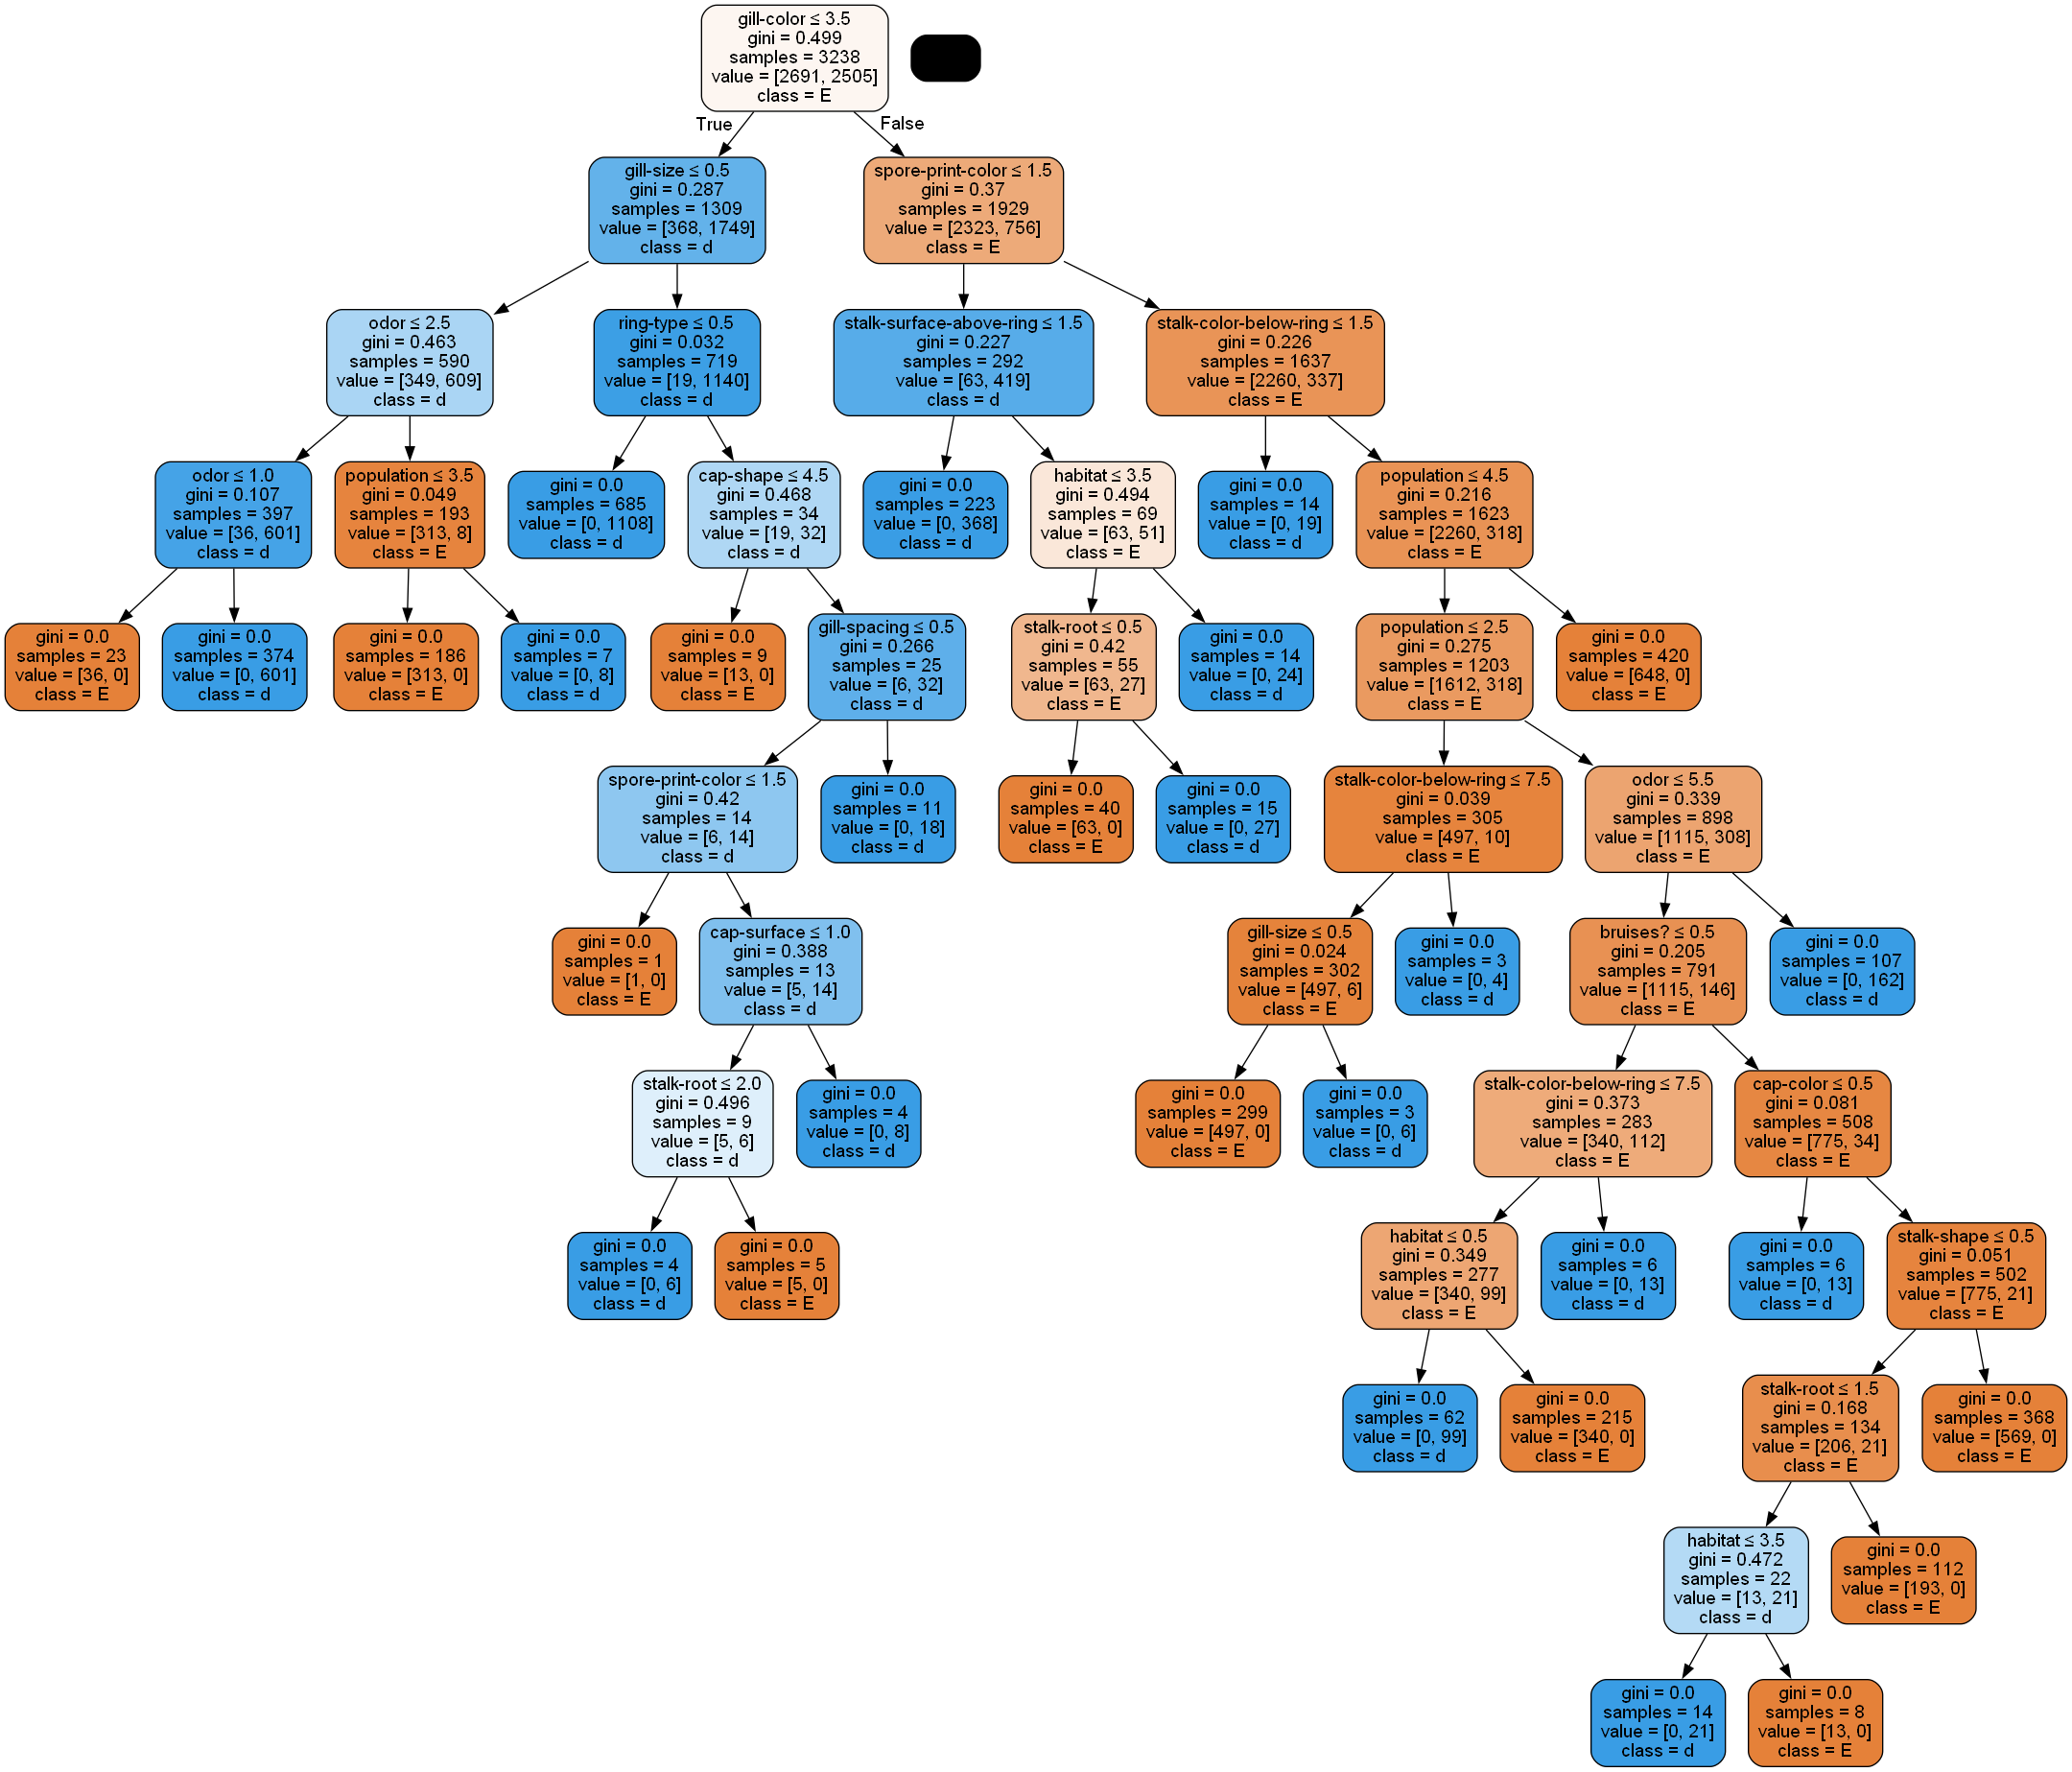

In [261]:
Image(graph.create_png())